In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("/kaggle/input/lung-cancer-dataset/dataset.json")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

null_values = df.isnull().sum()
null_values

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,3000.0,55.169000,14.723746,30.0,42.0,55.0,68.0,80.0
SMOKING,3000.0,1.491000,0.500002,1.0,1.0,1.0,2.0,2.0
YELLOW_FINGERS,3000.0,1.514000,0.499887,1.0,1.0,2.0,2.0,2.0
ANXIETY,3000.0,1.494000,0.500047,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,3000.0,1.499000,0.500082,1.0,1.0,1.0,2.0,2.0
CHRONIC_DISEASE,3000.0,1.509667,0.499990,1.0,1.0,2.0,2.0,2.0
FATIGUE,3000.0,1.489667,0.499977,1.0,1.0,1.0,2.0,2.0
ALLERGY,3000.0,1.506667,0.500039,1.0,1.0,2.0,2.0,2.0
WHEEZING,3000.0,1.497333,0.500076,1.0,1.0,1.0,2.0,2.0
ALCOHOL_CONSUMING,3000.0,1.491333,0.500008,1.0,1.0,1.0,2.0,2.0


In [5]:
# Count the number of duplicate records
num_duplicates = df.duplicated().sum()

print(f'Number of duplicate records: {num_duplicates}')

Number of duplicate records: 2


In [6]:
print(f'Length before dropping dups: {len(df)}')
df.drop_duplicates(inplace=True)
print(f'Length after dropping dups: {len(df)}')

Length before dropping dups: 3000
Length after dropping dups: 2998


#### Now let's convert our categorical data to numerical and check the correlations between each of our features

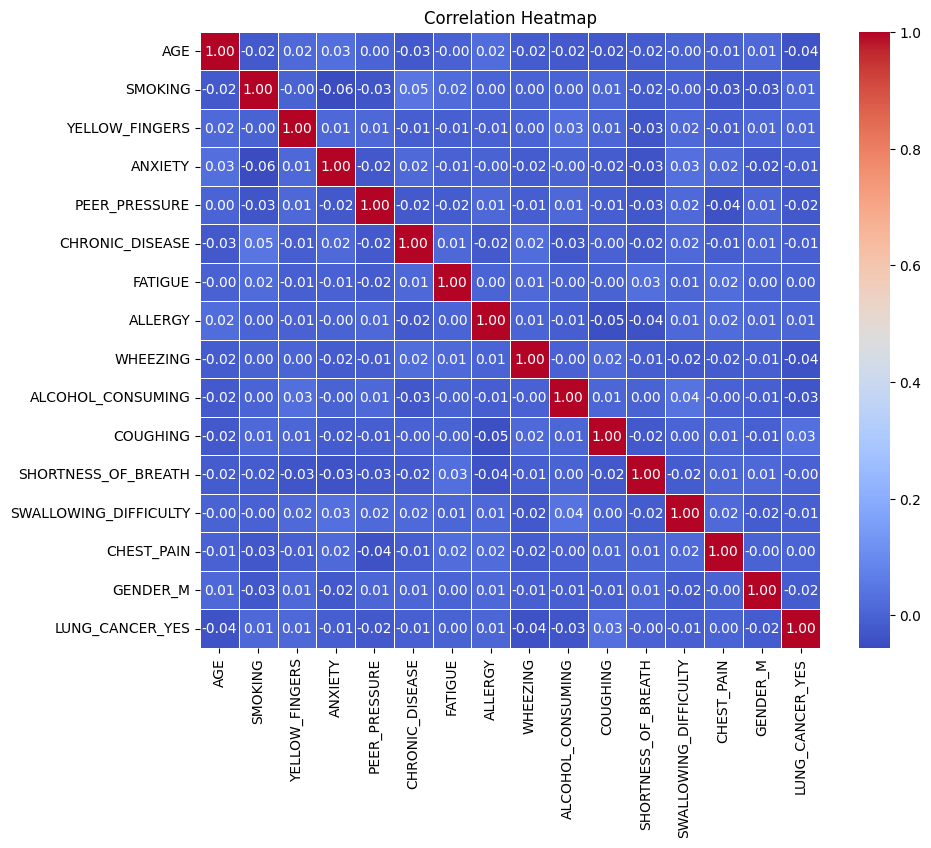

In [7]:
# Convert categorical data to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


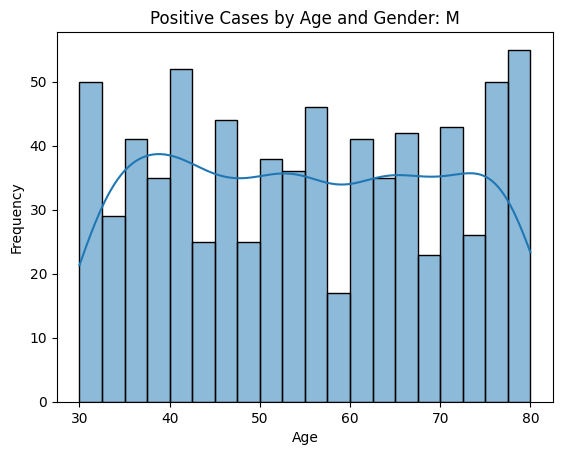

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


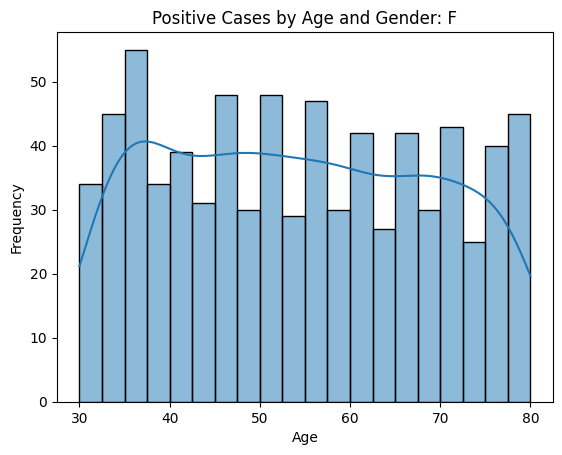

In [9]:
# Plot histograms
for x in df['GENDER'].unique():
    plt.figure()  # Create a new figure
    sns.histplot(df.loc[(df['GENDER'] == x) & (df['LUNG_CANCER'] == 'YES')]['AGE'], kde=True, bins=20)
    plt.title(f'Positive Cases by Age and Gender: {x}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()  # Display the plot

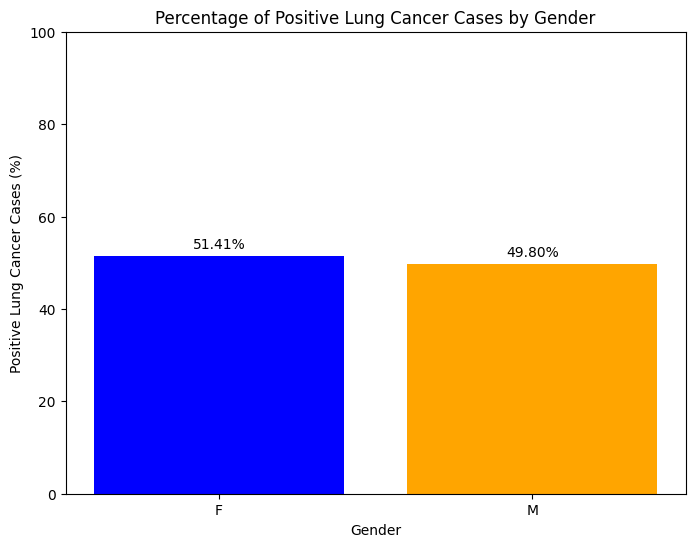

In [10]:
# Calculate the percentage of positive lung cancer cases for each gender
positive_counts = df[df['LUNG_CANCER'] == 'YES']['GENDER'].value_counts()
total_counts = df['GENDER'].value_counts()
positive_percent = (positive_counts / total_counts) * 100

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(positive_percent.index, positive_percent.values, color=['blue', 'orange'])

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Positive Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Positive Lung Cancer Cases (%)')
plt.ylim(0, 100)
plt.show()

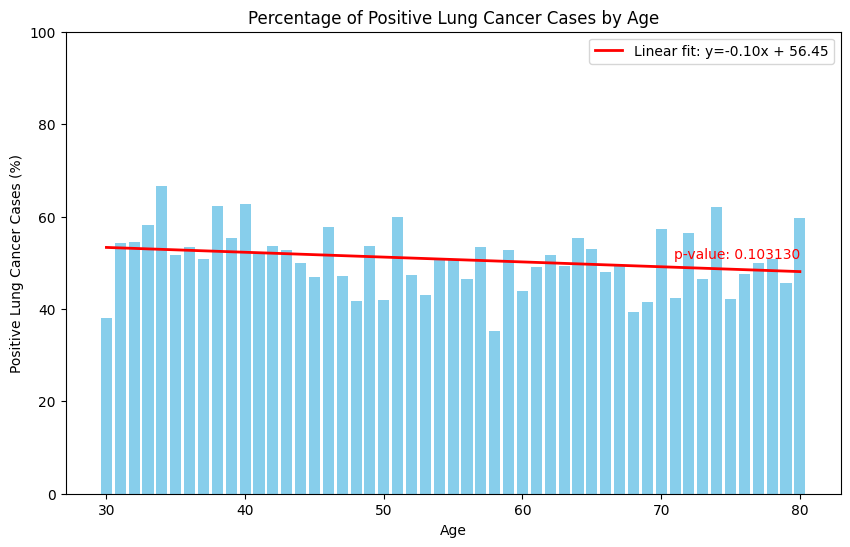

In [11]:
from scipy.stats import linregress

# Calculate the percentage of positive lung cancer cases by age
positive_counts = df[df['LUNG_CANCER'] == 'YES']['AGE'].value_counts()
total_counts = df['AGE'].value_counts()
positive_percent = (positive_counts / total_counts) * 100

# Sort by age
positive_percent = positive_percent.sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(positive_percent.index, positive_percent.values, color='skyblue')

# Linear regression
x = positive_percent.index.values
y = positive_percent.values
slope, intercept, r_value, p_value, std_err = linregress(x, y)
y_fit = slope * x + intercept

# Plot the linear regression line
plt.plot(x, y_fit, color='red', linewidth=2, label=f'Linear fit: y={slope:.2f}x + {intercept:.2f}')

# Add p-value to the plot
plt.text(max(x), max(y_fit), f'p-value: {p_value:.6f}', ha='right', va='top', color='red')

# Add title and labels
plt.title('Percentage of Positive Lung Cancer Cases by Age')
plt.xlabel('Age')
plt.ylabel('Positive Lung Cancer Cases (%)')
plt.ylim(0, 100)  
plt.legend()

# Show the plot
plt.show()

#### Since there is a high p-value we can conclude that the independent variable does not impact the dependent variable (ie. Positive Lung Cases to Age)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df['GENDER'] = df['GENDER'].map({'M':0, 'F':1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO':0, 'YES':1})

X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'RandomForest': RandomForestClassifier(),
    'LightGBM': LGBMClassifier(),
    'LogisticRegression': LogisticRegression()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy  # Store accuracy score

# Find the best model
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

# Print results
print("Model Accuracies:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.2f}")

print(f"\nBest Model: {best_model}")
print(f"Accuracy of Best Model: {best_accuracy:.2f}")

[LightGBM] [Info] Number of positive: 1217, number of negative: 1181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 2398, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507506 -> initscore=0.030027
[LightGBM] [Info] Start training from score 0.030027
Model Accuracies:
SVM: 0.51
XGBoost: 0.51
RandomForest: 0.54
LightGBM: 0.53
LogisticRegression: 0.50

Best Model: RandomForest
Accuracy of Best Model: 0.54


In [13]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

# Define base models
base_models = [
    ('svm', SVC(probability=True)),  # Include `probability=True` for stacking
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('rf', RandomForestClassifier()),
    ('lgbm', LGBMClassifier()),
    ('lr', LogisticRegression())
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking model
stacking_model = StackingClassifier(
    estimators=base_models, 
    final_estimator=meta_model,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred)

# Print results
print("\nHybrid Model Accuracy:")
print(f"Stacking Model: {stacking_accuracy:.2f}")


[LightGBM] [Info] Number of positive: 1217, number of negative: 1181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 2398, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507506 -> initscore=0.030027
[LightGBM] [Info] Start training from score 0.030027
[LightGBM] [Info] Number of positive: 974, number of negative: 944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 1918, number of used features: 15
[LightGBM] [Info] [binary:BoostF